In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [2]:
credit_data = pd.read_csv('CreditTrainData.csv')
print('setup complete')

setup complete


In [3]:
credit_data.head(25)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [4]:
credit_data.tail(25)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
251975,251976,2818775,56,13,single,rented,no,Surveyor,Madanapalle,Andhra_Pradesh,9,14,0
251976,251977,8577091,22,19,single,rented,no,Economist,Akola,Maharashtra,12,13,0
251977,251978,1330613,63,19,single,rented,no,Engineer,Purnia[26],Bihar,13,12,1
251978,251979,4828696,58,19,single,rented,yes,Police_officer,Nandyal,Andhra_Pradesh,12,14,0
251979,251980,944374,75,13,single,rented,yes,Microbiologist,Korba,Chhattisgarh,12,14,0
251980,251981,617965,69,9,single,rented,no,Magistrate,Panipat,Haryana,4,14,0
251981,251982,1796713,47,2,single,rented,no,Technician,Kolhapur,Maharashtra,2,12,1
251982,251983,3182290,52,2,single,rented,no,Drafter,Naihati,West_Bengal,2,10,1
251983,251984,1759752,37,17,single,rented,no,Technical_writer,Ahmednagar,Maharashtra,14,13,0
251984,251985,1826668,78,6,single,rented,no,Technology_specialist,Kulti,West_Bengal,6,11,0


In [5]:
credit_data.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


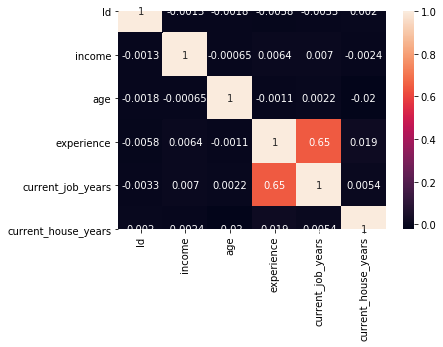

In [6]:
sns.heatmap(credit_data.drop(['risk_flag'], axis=1).corr(), annot=True)

In [7]:
credit_data.drop(['current_job_years'], axis=1, inplace=True)

In [8]:
# Detailed Summary of dataset
for col in credit_data.columns:
    if credit_data[col].dtype == 'object':
      print(credit_data[col].value_counts(), end='\n\n')

single     226272
married     25728
Name: married, dtype: int64

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

no     176000
yes     76000
Name: car_ownership, dtype: int64

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5

In [9]:
# Label Encoding 'married' & 'car_ownership'
for col in ['married', 'car_ownership']:
    lbe = LabelEncoder()
    credit_data[col] = lbe.fit_transform(credit_data[col])

In [10]:
credit_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_house_years,risk_flag
0,1,1303835,23,3,1,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,13,0
1,2,7574516,40,10,1,rented,0,Software_Developer,Parbhani,Maharashtra,13,0
2,3,3991815,66,4,0,rented,0,Technical_writer,Alappuzha,Kerala,10,0
3,4,6256451,41,2,1,rented,1,Software_Developer,Bhubaneswar,Odisha,12,1
4,5,5768871,47,11,1,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,14,1


In [11]:
credit_data = pd.get_dummies(credit_data, columns=["house_ownership"])
credit_data.rename({'house_ownership_owned': 'owned', \
                   'house_ownership_norent_noown': 'norent_noown', \
                   'house_ownership_rented': 'rented'}, axis=1, inplace=True)
credit_data.drop(['norent_noown', 'rented'], axis=1, inplace=True)
credit_data.head()

,Id,income,age,experience,married,car_ownership,profession,city,state,current_house_years,risk_flag,owned
0,1,1303835,23,3,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,13,0,0
1,2,7574516,40,10,1,0,Software_Developer,Parbhani,Maharashtra,13,0,0
2,3,3991815,66,4,0,0,Technical_writer,Alappuzha,Kerala,10,0,0
3,4,6256451,41,2,1,1,Software_Developer,Bhubaneswar,Odisha,12,1,0
4,5,5768871,47,11,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,14,1,0


In [12]:
# Target Encoding ['state', 'city', 'profession'], due to high cardinality.
te = TargetEncoder(cols=['state', 'city', 'profession'])
credit_data = te.fit_transform(credit_data, credit_data['risk_flag'])

In [13]:
credit_data.head()

,Id,income,age,experience,married,car_ownership,profession,city,state,current_house_years,risk_flag,owned
0,1,1303835,23,3,1,0,0.111558,0.121554,0.154369,13,0,0
1,2,7574516,40,10,1,0,0.148427,0.122497,0.113254,13,0,0
2,3,3991815,66,4,0,0,0.134167,0.130814,0.167097,10,0,0
3,4,6256451,41,2,1,1,0.148427,0.326194,0.142550,12,1,0
4,5,5768871,47,11,1,0,0.115794,0.121137,0.103163,14,1,0


0.12189239332096476


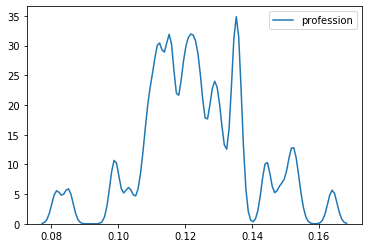

In [14]:
sns.kdeplot(data=credit_data.profession)
print(np.median(credit_data['profession']))

0.12030075187969924


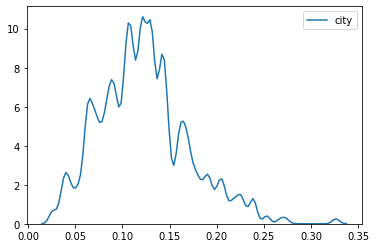

In [15]:
sns.kdeplot(data=credit_data.city)
print(np.median(credit_data['city']))

0.11772440392706872


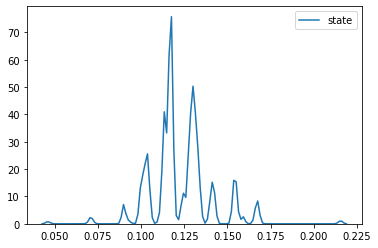

In [16]:
sns.kdeplot(data=credit_data.state)
print(np.median(credit_data['state']))

In [17]:
for column in ['state', 'city', 'profession']:
    column_median = np.median(credit_data[column])
    credit_data[column] = credit_data[column].map(lambda x: int(x > column_median))

In [18]:
# New feature 'income/experience'
credit_data['experience'] = credit_data['experience'].replace(0, 1)
credit_data['avg_income_per_annum'] = credit_data['income'].values / (credit_data['age'].values * credit_data['experience'].values)

credit_data.drop(['income', 'experience'], axis=1, inplace=True)

In [19]:
# Outlier Treatment
def outlier_removal(df):
    
    df0 = df[df['risk_flag']==0]
    df1 = df[df['risk_flag']==1]
    
    out_free_data = []
    
    for col in ['avg_income_per_annum', 'age', 'current_house_years']:

        df0 = df0.assign(outl=False)
        p = np.percentile(df0[col].values, 25, interpolation='midpoint')
        q = np.percentile(df0[col].values, 75, interpolation='midpoint')
        iqr = q-p
        df0.outl = df0[col].map(lambda x: (x < p-(1.5*iqr) or x > q+(1.5*iqr)))
        df0.drop(df0[df0.outl == True].index, inplace=True)
        df0.reset_index(drop=True, inplace=True)

    out_free_data.append(df0)
    out_free_data.append(df1)
    
    df_n = pd.concat(out_free_data, ignore_index=True)
    df_n.drop(['outl'], axis=1, inplace=True)
    
    return df_n, df_n.shape[0] - df.shape[0]

In [20]:
for i in range(3):
    credit_data, loss = outlier_removal(credit_data)
    print('Loss:', loss)

Loss: -25714
Loss: -10316
Loss: -4585


In [21]:
credit_data.head()

,Id,age,married,car_ownership,profession,city,state,current_house_years,risk_flag,owned,avg_income_per_annum
0,1,23,1,0,0,1,1,13,0,0,18896.159420
1,2,40,1,0,1,1,0,13,0,0,18936.290000
2,3,66,0,0,1,1,1,10,0,0,15120.511364
3,7,58,0,0,0,0,0,12,0,0,4870.656404
4,8,33,1,0,0,0,0,14,0,0,25851.090909


In [22]:
credit_data.describe()

,Id,age,married,car_ownership,profession,city,state,current_house_years,risk_flag,owned,avg_income_per_annum
count,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000,211385.000000
mean,125986.761502,51.173508,0.898607,0.302704,0.488545,0.499208,0.468311,12.000099,0.146633,0.052454,12569.217041
std,72823.793757,16.852946,0.301849,0.459429,0.499870,0.500001,0.498996,1.402371,0.353740,0.222941,21134.459233
min,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,7.364286
25%,62912.000000,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,4210.636792
50%,126032.000000,52.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,8507.377960
75%,189073.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,0.000000,0.000000,14873.252381
max,252000.000000,79.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,462187.238095


In [23]:
mMs = MinMaxScaler()
temp_data = mMs.fit_transform(credit_data)
credit_data = pd.DataFrame(temp_data, columns=credit_data.columns)

obj_cols = ['married', 'car_ownership', 'profession', 'city', 'state', 'risk_flag', 'owned']
for col in obj_cols:
    credit_data[col] = credit_data[col].values.astype('int64')

credit_data.head()

,Id,age,married,car_ownership,profession,city,state,current_house_years,risk_flag,owned,avg_income_per_annum
0,0.000000,0.034483,1,0,0,1,1,0.75,0,0,0.040869
1,0.000004,0.327586,1,0,1,1,0,0.75,0,0,0.040956
2,0.000008,0.775862,0,0,1,1,1,0.00,0,0,0.032700
3,0.000024,0.637931,0,0,0,0,0,0.50,0,0,0.010523
4,0.000028,0.206897,1,0,0,0,0,1.00,0,0,0.055917


In [24]:
credit_data.drop(['married', 'owned', 'car_ownership', 'current_house_years'], axis=1, inplace=True)

In [25]:
credit_data.to_csv('credit_defaulters_data.csv')
print('Complete')

Complete
